# Super Bowl EDA

## 1. TV, devre arası gösterileri, ve Büyük Oyun
<p>Super Bowl, ABD'de her yıl düzenlenen Amerikan futbolu ligi National Football League'in şampiyonluk maçıdır. Ancak sadece futbol maçı ile sınırlı değildir bu bir gösteridir. Sporseverler için patlama, geri dönüş ve tartışma şeklinde dramalar ve bazıları komik, diğerleri yürek burkan, düşündürücü ve tuhaf, gülünç derecede pahalı reklamlar var. Dünyanın en büyük müzisyenleri ile devre arası gösterileri, bazen <a href="https://youtu.be/ZD1QrIe--_Y?t=14">dev mekanik kaplanlara binmek</a> ya da <a href="https://youtu.be/mjrdywp5nyE?t=62">stadyumun çatısından sıçramak</a>. Bu notebook'da, bu gösterinin bazı öğelerinin birbirleriyle nasıl etkileşime girdiğini analiz edeceğiz. Verilerimizi biraz araştırıp temizledikten sonra, aşağıdaki gibi sorulara cevap vereceğiz:</p>
<ul>
<li>En olağanüstü oyun sonuçları nelerdir?</li>
<li>Oyun, televizyon izleyiciliğini nasıl etkiliyor?</li>
<li>İzleyici sayısı, TV derecelendirmeleri ve reklam maliyeti zaman içinde nasıl değişti?</li>
<li>Devre arası gösteri performansları açısından en üretken müzisyenler kimler?</li>
</ul>
<p><img src="https://assets.datacamp.com/production/project_684/img/left_shark.jpg" alt="Soldaki Köpekbalığı Rol Çaldı">
<em><a href="https://www.flickr.com/photos/huntleypaton/16464994135/in/photostream/">Soldaki Köpekbalığı Rol Çaldı</a>. Katy Perry, Super Bowl XLIX'in devre arasında performans sergiliyor.</em></p>
<p>Kullanacağımız veri seti Wikipedia'dan <a href="https://en.wikipedia.org/wiki/Web_scraping">kazınmış</a> ve cilalanmıştır. 3 Üç adet CSV dosyasından oluşur; birincisi <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions">oyun verisi</a>, ikincisi <a href="https://en.wikipedia.org/wiki/Super_Bowl_television_ratings">TV verisi</a>, ve üçüncüsü <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows">devre arası müzisyen verisi.</a> 2018'e kadar gerçekleşen 52 adet Super Bowl'dan oluşur. Jupyter Notebook'larda çıktısı çok daha güzel olduğu için <code>print()</code> yerine <code>display()</code> kullanarak bi göz atalım.</p>

In [1]:
# Pandas'ı import etmek
import pandas as pd

# CSV verilerini DataFrame olarak yüklemek
super_bowls = pd.read_csv("datasets/super_bowls.csv")
tv = pd.read_csv("datasets/tv.csv")
halftime_musicians = pd.read_csv("datasets/halftime_musicians.csv")

# Her bir DataFrame'in ilk beş satırını görüntülemek
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## 2. Veri seti sorunlarını not almak
<p>Super Bowl oyun verileri için, veri setinin yedek oyun kurucu sütunlarındaki (<code>qb_winner_2</code> ve <code>qb_loser_2</code>) eksik değerler dışında bir bütün olarak göründüğünü görebiliriz; bu, Super Bowl oyunundaki çoğu başlangıç QB'sine (<code>qb_winner_1</code> ve <code>qb_loser_1</code>) bakıldığında mantıklıdır. 
<p>TV ve devre arası müzisyen verilerinin görsel incelemesinden, görüntülenen yalnızca bir eksik değer var, ancak daha fazlası olduğuna dair bir önsezim var. Super Bowl 1967'ye kadar uzanıyor ve daha ayrıntılı sütunlar (ör. Devre arası müzisyenleri için şarkı sayısı) muhtemelen zaman içinde güvenilir bir şekilde izlenemedi. Wikipedia harika ama mükemmel değil</p>
<p><code>tv</code> ve <code>halftime_musicians</code> için <code>.info()</code> çıktısının incelenmesi, bize boş değerli birden çok sütun olduğunu gösterir.</p>

In [2]:
# İncelenecek TV verilerinin özeti
tv.info()

print('\n')

# İncelenecek devre arası müzisyen verilerinin özeti
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: 

<p>TV verileri için, aşağıdaki sütunlarda eksik değerler var ve bunların çoğu:</p>
<ul>
<li><code>total_us_viewers</code> (Yayının en azından bir kısmını izleyen ABD'li izleyici sayısı)</li>
<li><code>rating_18_49</code> (Televizyonu olan ve tüm yayını izleyen bir evde yaşayan 18-49 yaş arasındaki ABD'li yetişkinlerin ortalama yüzdesi)</li>
<li><code>share_18_49</code> (
Televizyonun kullanıldığı bir evde yaşayan 18-49 yaş arasındaki ABD'li yetişkinlerin ortalama yüzdesi yayının tamamını izliyor)</li>
</ul>
<p>Devre arası müzisyen verileri için performansların yaklaşık üçte biri için eksik çalınan şarkı sayısı var (<code>num_songs</code>) .</p>

## 3. Oyunların Toplam Skor Histogramı
<p>Super Bowl tarihi boyunca en yüksek ve en düşük skorlu oyunlar.</p>

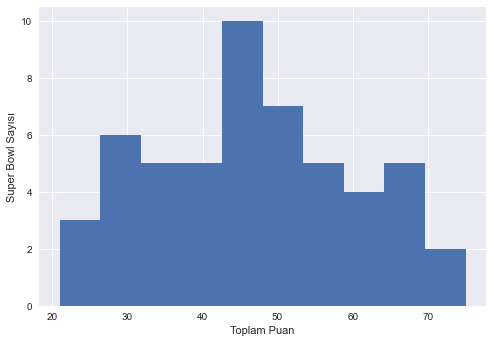

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [4]:
# matplotlib import etme ve plot çizmini belirleme
from matplotlib import pyplot as plt
# plt.show()'a gerek yok
%matplotlib inline 
plt.style.use('seaborn')

# Toplam puanların histogramı
plt.hist(super_bowls["combined_pts"])
plt.xlabel('Toplam Puan')
plt.ylabel('Super Bowl Sayısı')
plt.show() # Grafiği çıktılardan önce görmek için

# Super Bowl tarihi boyunca en yüksek ve en düşük skorlu oyunlar
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

* Super Bowl tarihinin **en yüksek skor**lu oyunu 1995 yılında 75 skorla San Francisco 49ers - San Diego Chargers arasında gerçekleşmiş. Mücadeleyi 49 - 26'lık skorla San Francisco 49ers kazanmış.
* Super Bowl tarihinin **en düşük skor**lu oyunu 1973 yılında 21 skorla Miami Dolphins - Washington Redskins arasında gerçekleşmiş. Mücadeleyi 14 - 7'lik skorla Miami Dolphins kazanmış.

## 4. Oyunlardaki Skor Farkı Histogramı
<p>Super Bowl tarihindeki ortalama skor farkları ve en yakın geçen maçlar</p>

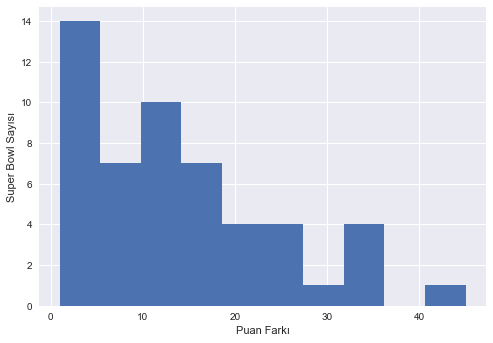

In [8]:
plt.hist(super_bowls.difference_pts)
plt.xlabel("Skor Farkı")
plt.ylabel("Super Bowl Sayısı")
plt.show()

In [11]:
display(super_bowls[super_bowls["difference_pts"] == 1])
display(super_bowls[super_bowls["difference_pts"] >= 40])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45


* En düşük skor farkı 1991 yılında New York Giants takımının Buffalo Bills takımını 20 - 19 yenmesi ile **1** skor farkla oluşmuştur.
* En yüksek skor farkı ise en düşük skor farkının yaşanmasından 1 yıl önce 1990 yılında San Francisco 49ers'ın Denver Broncos'u 55 - 10 yenmesiyle **45** skor farkla oluşmuştur.
* Genel olarak skor farklılıkları düşüktür. Sonuçta bu bir final ve bu beklenen bir durumdur.

## 5. Skor Farkı ve TV İzlenme İlişkisi

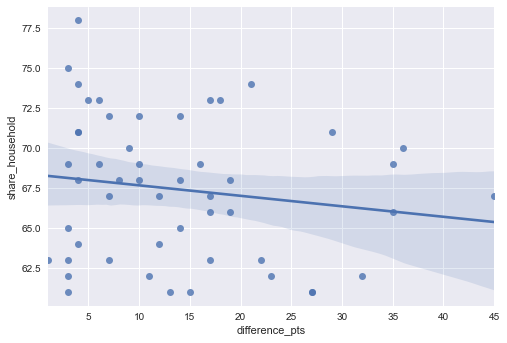

In [5]:
# Oyunların tv verilerine etkisini görmek için iki farklı veri setinden verileri birleştirme
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# seaborn import etme
import seaborn as sns

# Doğrusal regresyon modeliyle scatter oluşturma
sns.regplot(x="difference_pts", y="share_household", data=games_tv); # gelişmiş scatter plot

* Güven aralığının yüksek olması ve aşağı doğru bir eğim olması sebebiyle yüksek skor farklılıklarının yaşanması izleyici kaybına neden olur diyebiliriz. Ama çok net yorumlar yapmak için de daha fazla veriye ihtiyacımız var.

## 6. Zaman İçinde Görüntüleme ve Reklam Sektörü
<p>Devre arası gösterileri TV kanalları ve reklamcılar için önemlidir. 30 saniyelik bir reklam şu anda 5 milyon dolara mal oluyor, ama her zaman böyle miydi? Ve reklam maliyetinin yanında izleyici sayısı ve hane halkı puanları nasıl bir eğilim gösterdi? Bir 'Super Bowl' x eksenini paylaşan çizgi grafiklerini kullanarak bulabiliriz.</p>

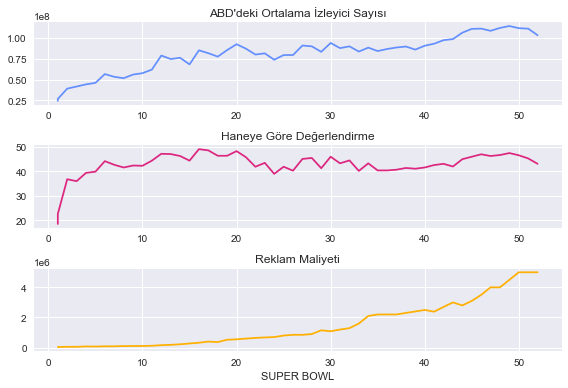

In [6]:
# 3x1'lik subplot figürü oluşturma ve üst subplotu aktif etme
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color='#648FFF')
plt.title("ABD'deki Ortalama İzleyici Sayısı")

# Ortadaki subplotu aktif etme
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color='#DC267F')
plt.title('Haneye Göre Değerlendirme')

# Alttaki subplotu aktif etme
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, color='#FFB000')
plt.title('Reklam Maliyeti')
plt.xlabel('SUPER BOWL')

# Subplotlar arasındaki aralığı iyileştirme
plt.tight_layout()

* İzleyici sayıları reklam maliyetlerine göre daha önce artış göstermiş. Ancak muhtemelen network veriler hakkında şu anki kadar bilgili olmadığı için erken reaksiyon gösteremedi.

## 7. Devre Arası Müzisyenleri
<p>Geç artışın bir sebebi de devre arası gösterilerinin önceki yıllarda bu kadar iyi olmaması olabilir. Michael Jackson'ın Super Bowl performansına kadar insanlar devre arası gösterilerinin bu denli önemli olduğunun farkında değillerdi.</p>

In [24]:
# Super Bowl XXVII'e kadar devre arası gösterileri vermiş müzisyenler
halftime_musicians[halftime_musicians.super_bowl <= 27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


* Liste göze alındığında Michael Jackson'a kadar tanınmış kişilerin olmaması devre arası gösterilerinin yetersiz olduğunun kanıtı olabilir.

## 8. Müzisyenlerin Devre Arası Gösteri Sayıları
<p>Performans sayıları da dahil olmak üzere birden fazla devre arası gösterisi yapmış tüm müzisyenler</p>

In [7]:
# Her müzisyen için devre arası gösterilerinin sayılması ve sıralanması
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Birden fazla devre arası gösterisi veren müzisyenler
display(halftime_appearances[halftime_appearances.super_bowl > 1])

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


* Grambling State University Tiger Marching Band, en fazla devre arası gösterisi veren müzisyen grubudur.
* Tekil olarak en fazla gösteri veren müzisyenler ikişer kez ile Bruno Mars, Beyonce, Justin Timberlake ve Nelly.

## 9. En Çok Şarkı Seslendiren Müzisyenler
<p> Önceki incelemelere göre, num_songs sütununda birçok eksik değer var:</p>

* Pek çok grupta num_songs girişi yok.
* Eksik veriler Super Bowl XX'de oluşmaya başlar.

<p> Müzisyenlerin içinde 'Marching' kelimesi ve 'Spirit' kelimesi (bandolar için yaygın bir adlandırma kuralı 'Spirit of [bir şey]' dir) olan müzisyenleri filtreleyip dışarıda bırakalım. Ardından, eksik veri sorununu gidermek için Super Bowl XX'den sonra Super Bowls için filtre uygulayacağız, sonra kimin en çok şarkıya sahip olduğunu görelim.</p>

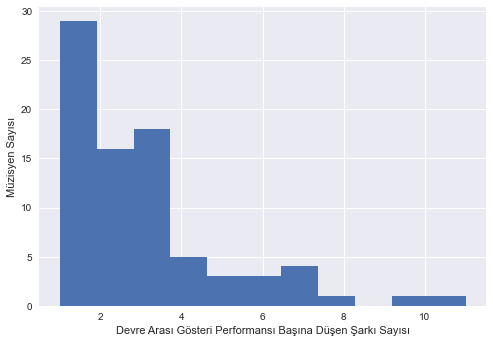

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [27]:
# Bando ekiplerini filtreleme
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Gösteri performansı başına düşen şarkı sayısı
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Devre Arası Gösteri Performansı Başına Düşen Şarkı Sayısı')
plt.ylabel('Müzisyen Sayısı')
plt.show()

# Grup olmayan müzisyenleri gösteri performansı başına düşen şarkı sayısına göre sıralama...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...ve ilk 15i görüntüleme
display(no_bands.head(15))

* Devre arasının süresi kısıtlı olduğu için genelde müzisyenler 1-3 şarkı arası söyler. Ancak bu şarkı hit sayınıza göre değişebilir.
* Verilere göre en çok şarkıyı 11 şarkı ile Justin Timberlake söylemiştir.

## 10. Sonuç
<p>Bu notebook'da Super Bowl maç, televizyon ve devre arası gösterileri verilerini yükledik, temizledik ve araştırdık. Histogramları kullanarak birleşik noktaların, nokta farklılıklarının ve devre arası gösteri performanslarının dağılımlarını görselleştirdik. İzleyici artışlarının gerisinde kalan reklam maliyeti artışlarını görmek için çizgi grafikleri kullandık. Ve patlamaların izleyicilerin sayısında bir düşüşe yol açtığını keşfettik.</p>